## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import Dataset

In [2]:
#Load Data
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## Exploratory Data Analysis

In [3]:
# Shape (Rows by Columns)
df.shape

(303, 14)

In [4]:
#Decription of Dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [5]:
#Information about dataset (Metadata)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


## Data issues: missing values, duplicate values, outliers

In [6]:
#Missing Values Checking
df.isnull().sum() #No Nulls

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
#Check Duplicates
df[df.duplicated(subset=None, keep='first')]

#Looks like there is one duplicated row. Let's look at this deeper to see if we need to change this.

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [8]:
#Check duplicates part 2
df[163:165]

#Row 163 and 165 are exactly the same, but this is possible becuase there is still a chance that two individuals have the same values.And, this doesn't affect the data at all

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000129FFF09B08>,
      dtype=object)

<Figure size 1440x720 with 0 Axes>

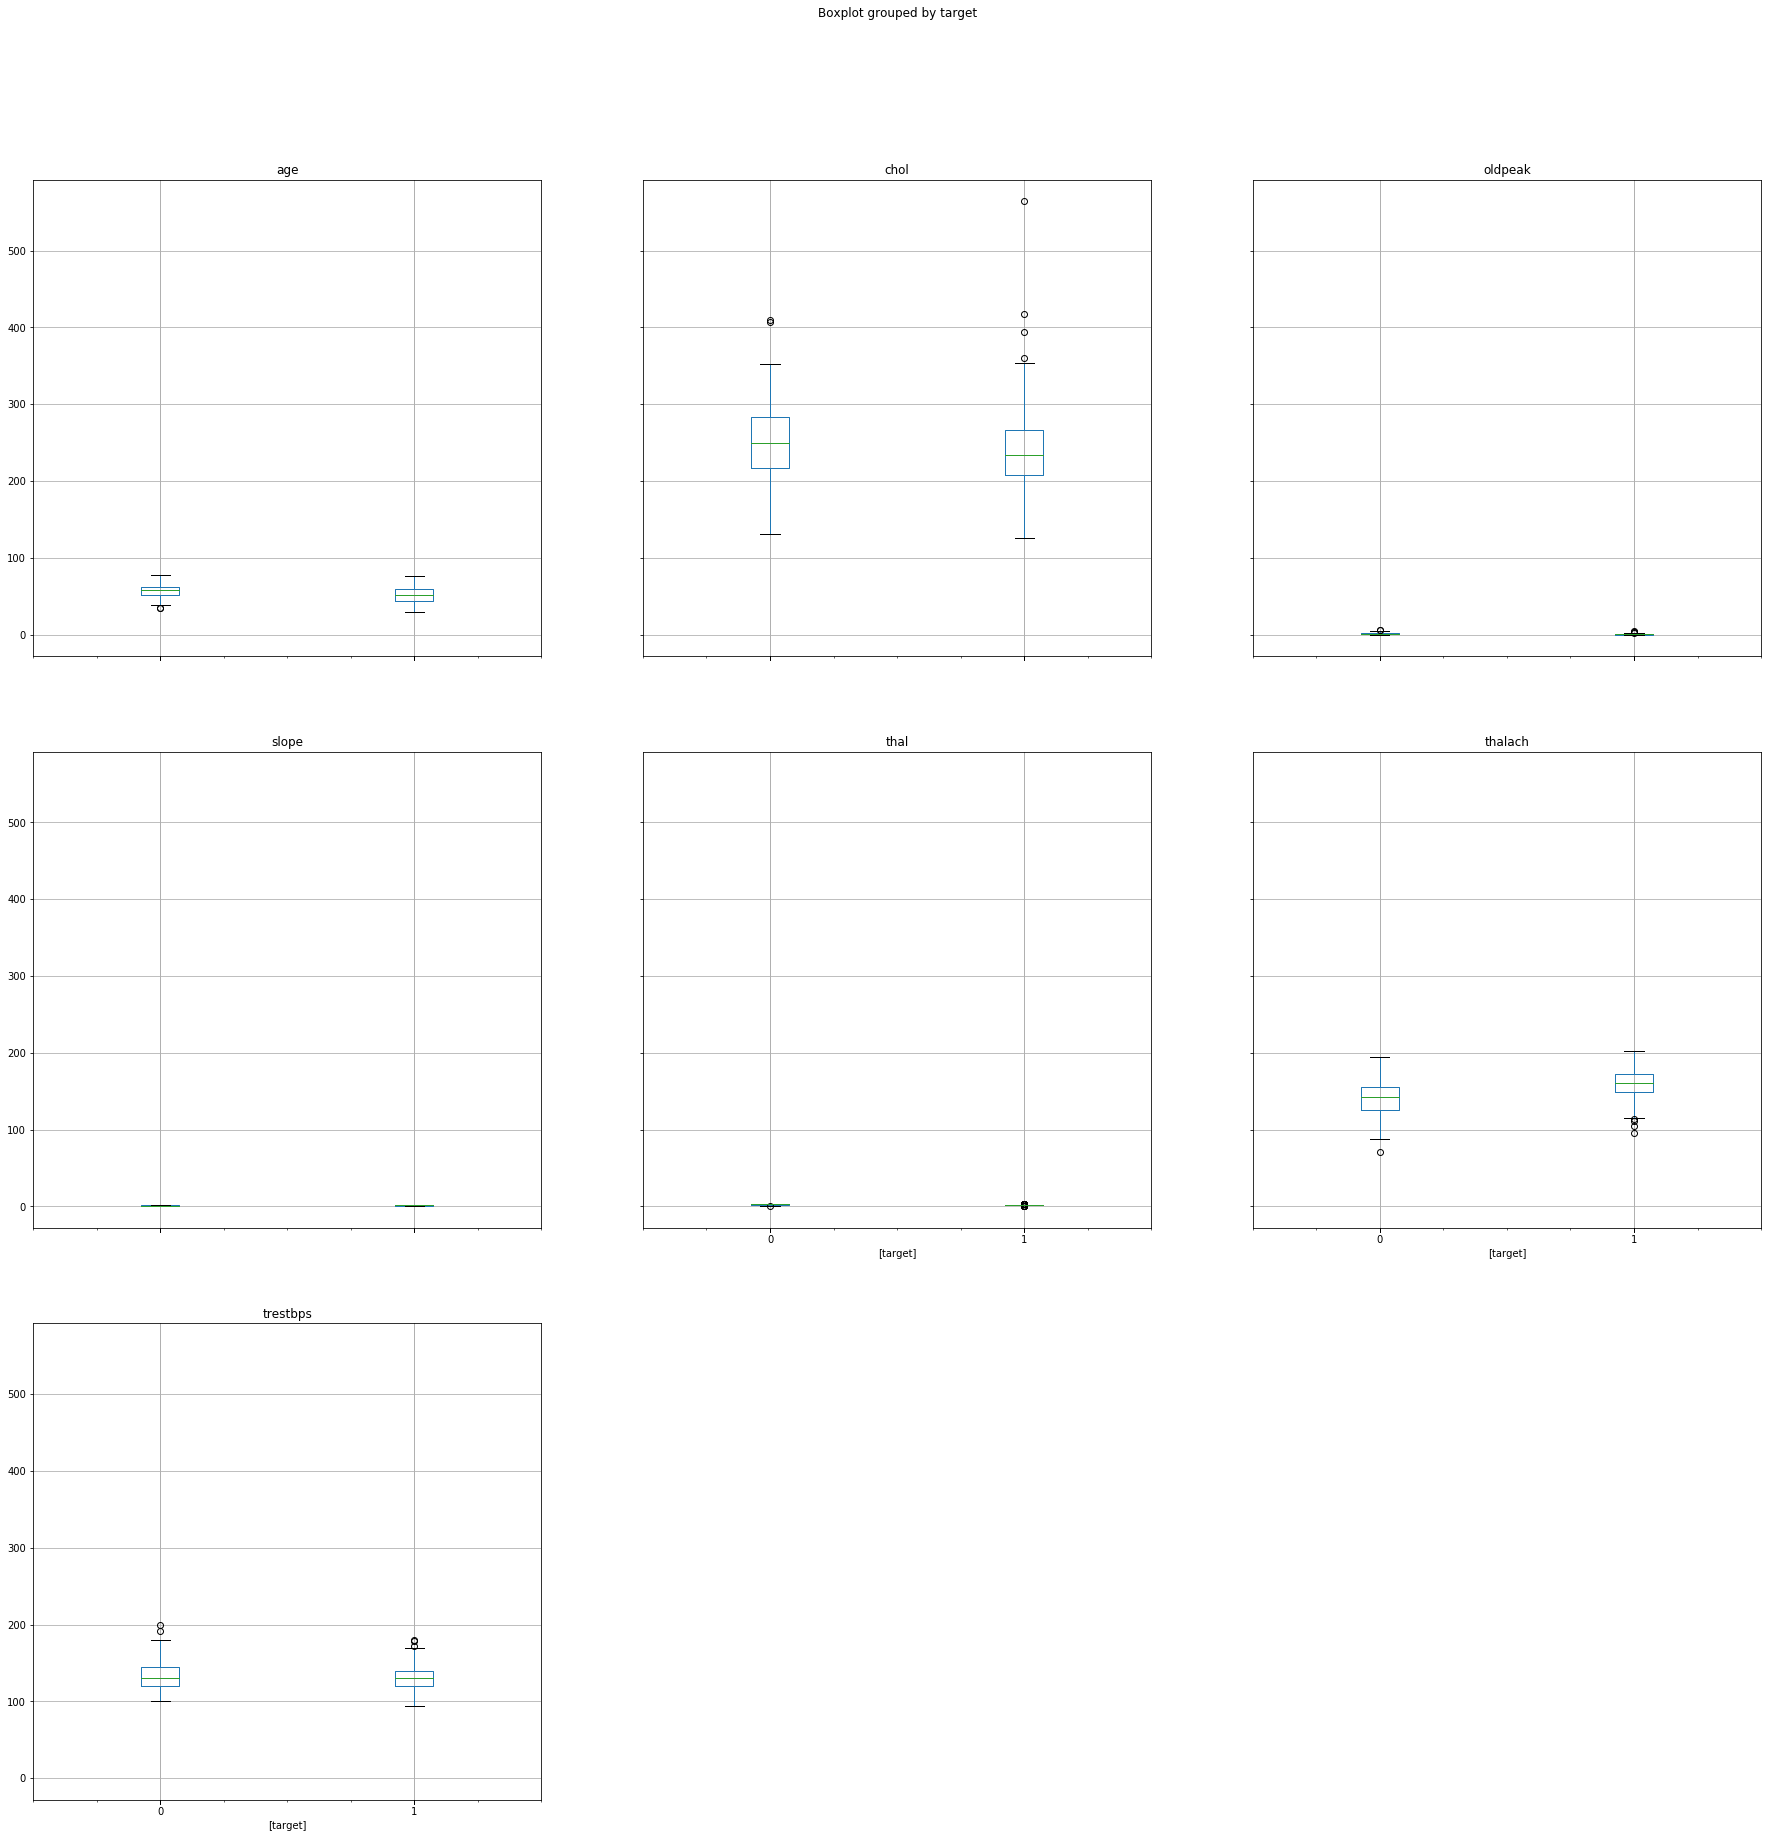

In [9]:
#checking outliers by target

#there are columns where the values are binary. These values are useless to identify outliers.Let's create a new dataframe 
#only with values that are pertinent for the outlier analysis

outlier_analysis=df[['age','trestbps','chol','thalach','oldpeak','slope','thal','target']]

plt.figure(figsize=(20,10))
outlier_analysis.boxplot(by=['target'],figsize=(30,30))


(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281], dtype=int64), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12],
      dtype=int64))


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001298CDE7B88>,
      dtype=object)

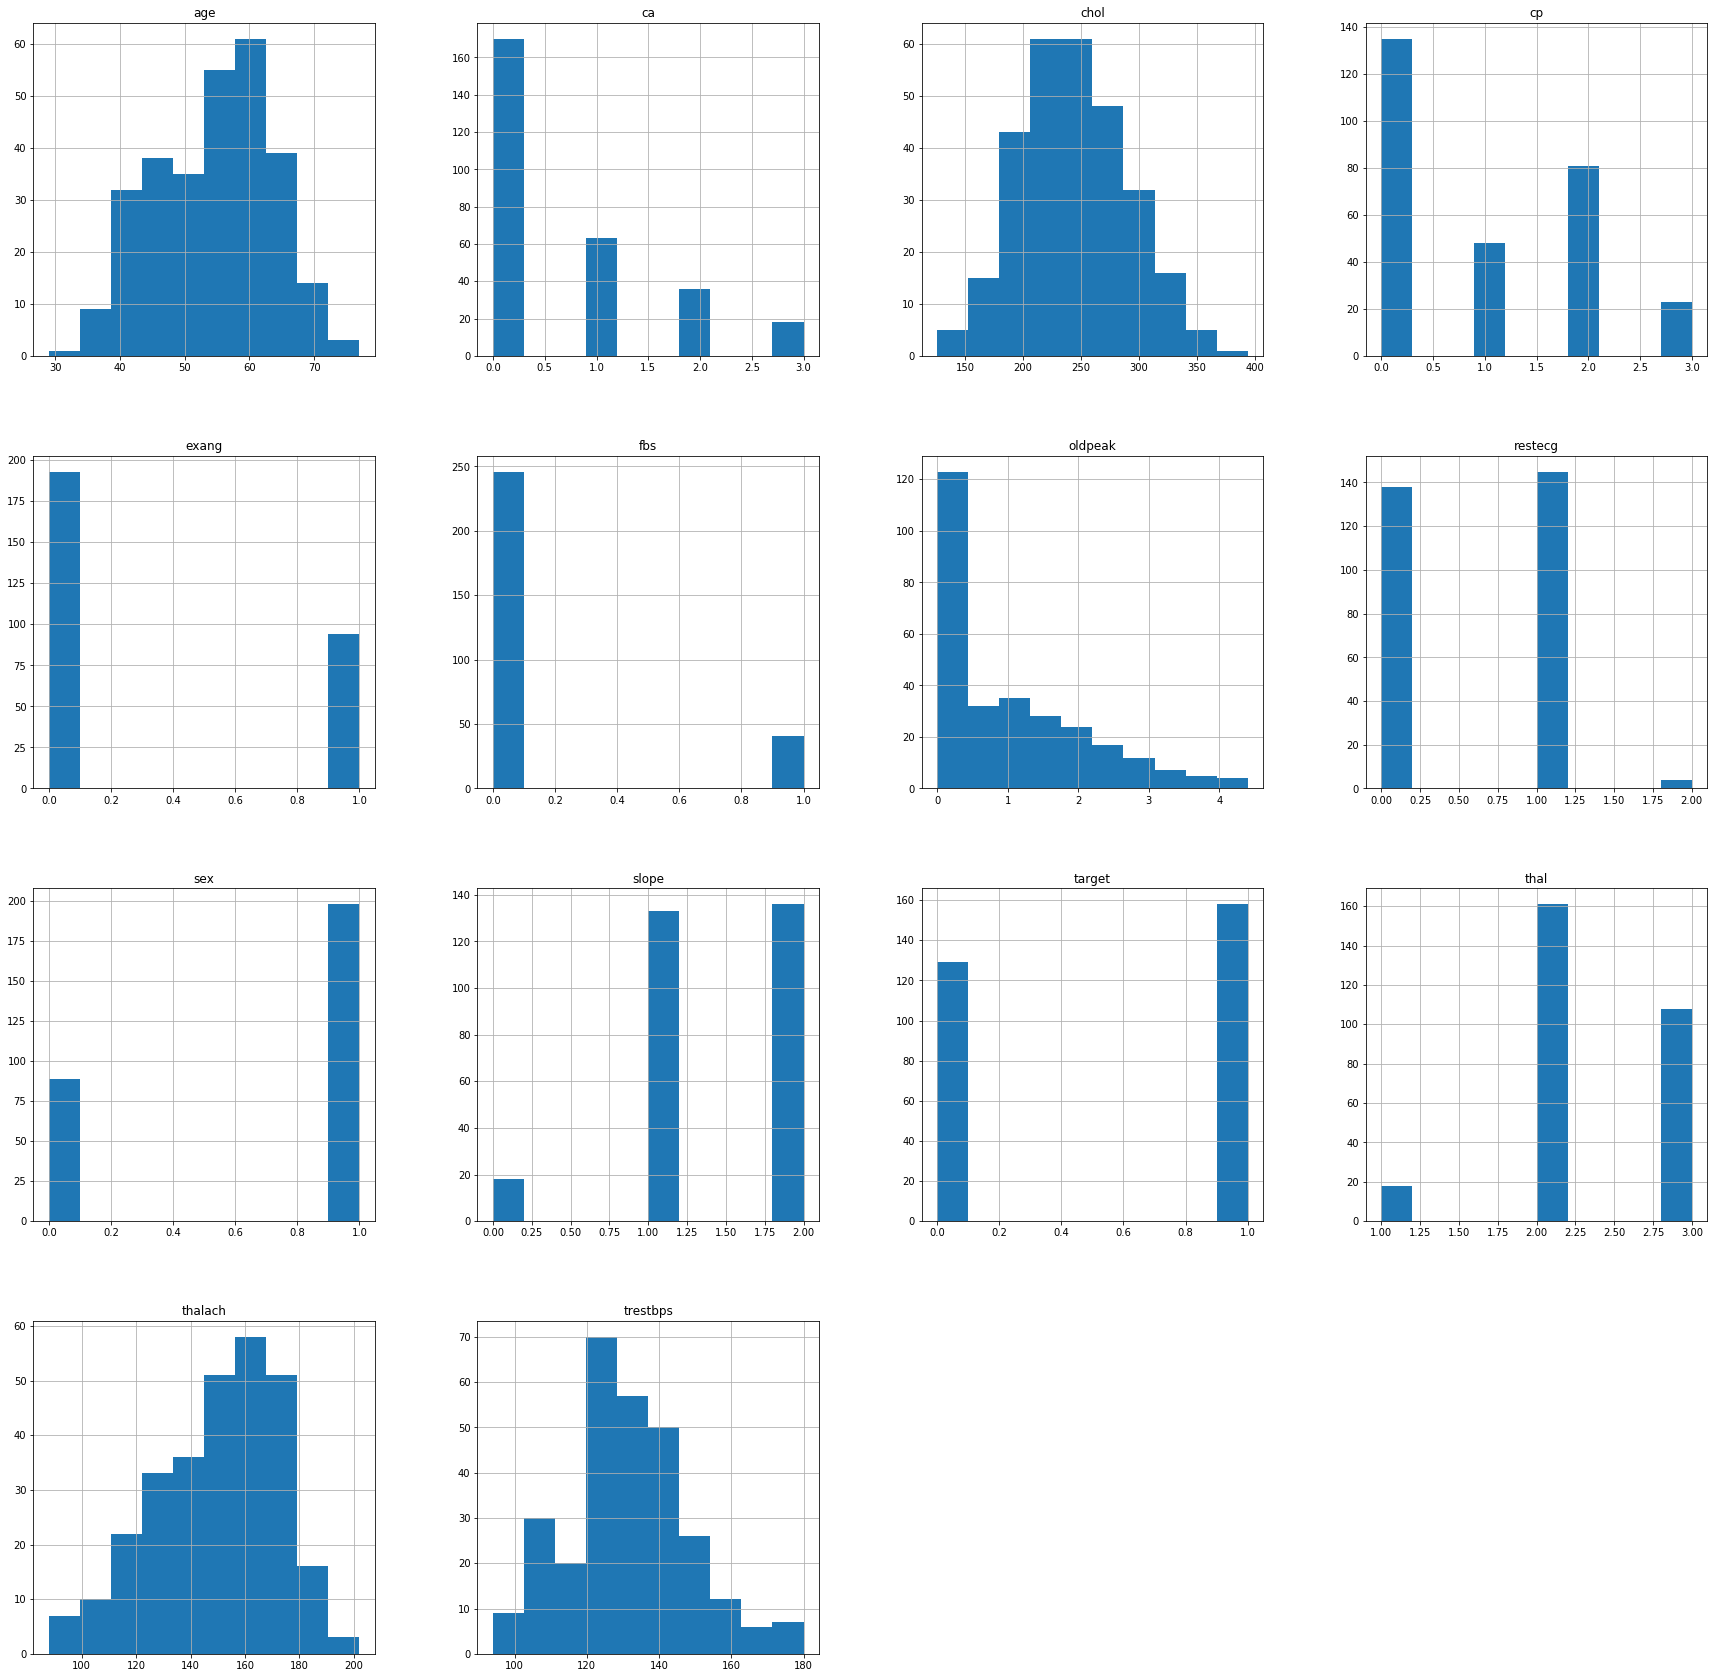

In [19]:
#checking outliers by target part 2

#Attribute to TowardsDataScience by explaining analyzing outliers with Z - scores
#https://towardsdatascience.com/ways-to-detect-and-remove-the-outliers-404d16608dba

from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))


#Now we have the z score of every column of the dataset, but it is hard to see. Let's look even closer to this.

#lets apply a thershold to identify those outliers, which are those values with a z score higher than 3.

threshold = 3
print(np.where(z > 3))


#lets remove those outliers that have a z score greater than 3

df = df[(z < 3).all(axis=1)]


df.hist(figsize=(30,30))


# Describe the realtionship of features to your target (should include at least a few plots).

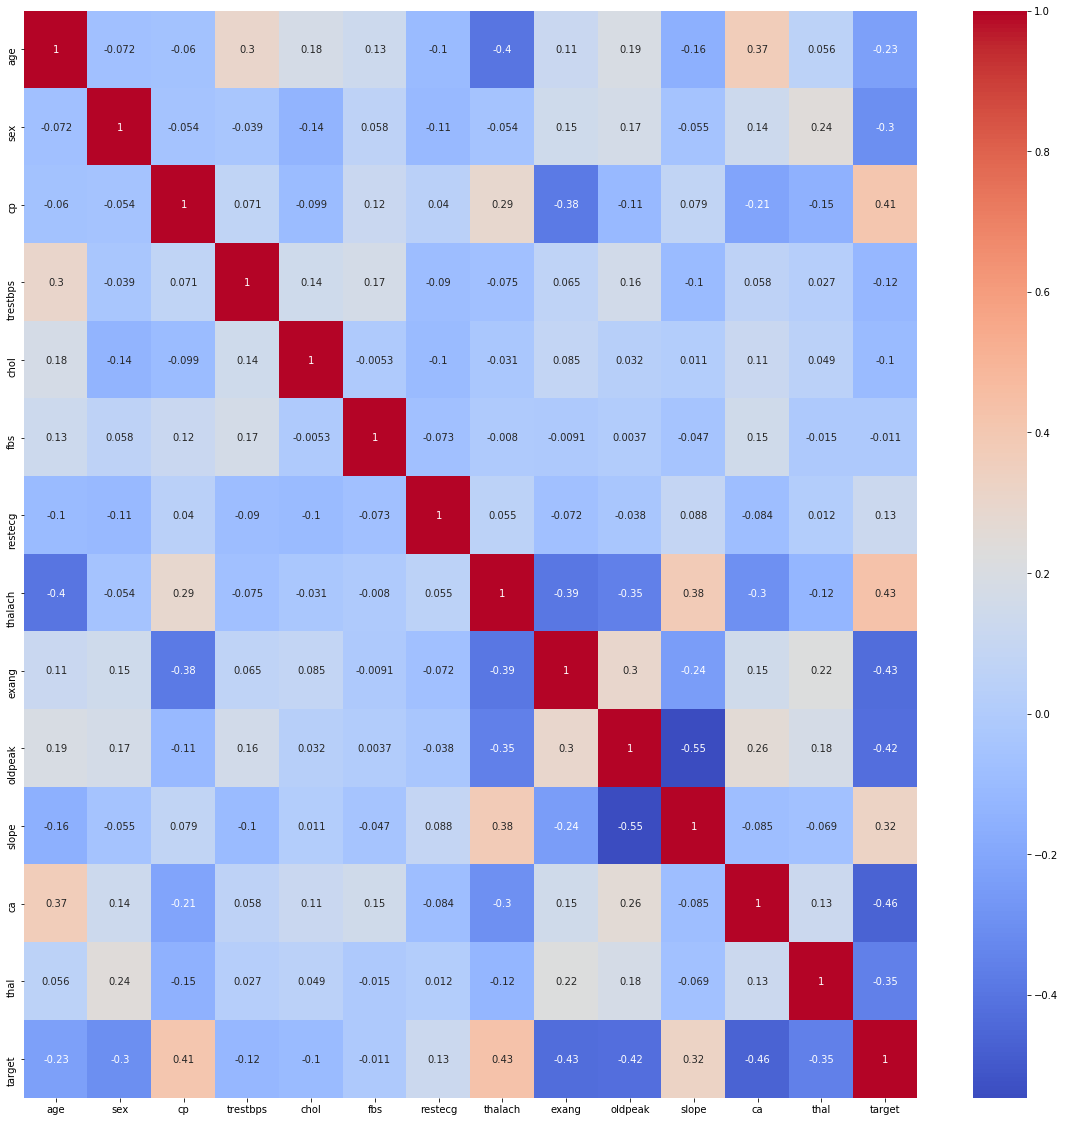

In [24]:
#Dataset Correlation/ Let's look at those values that are highly correlated
correlations=df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(correlations,cmap='coolwarm', annot=True)

# Logistic Regression

# Importing libraries and Splitting data into train/test sets

In [51]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split

X=df.drop(columns=['target'])
y=df['target']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=35) 


In [70]:
X_train.shape

(192, 13)

In [71]:
X_test.shape

(95, 13)

# Fitting Model

In [72]:
log_mod=LogisticRegression(random_state=35)
log_mod.fit(X_train,y_train)

C:\Users\jonas\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=35, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Predicting

In [73]:
predictions=log_mod.predict(X_test)

In [74]:
predictions

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1], dtype=int64)

# Measuring Performance

In [75]:
log_mod.score(X_test,y_test)

0.8842105263157894

In [76]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.80      0.86        44
           1       0.84      0.96      0.90        51

    accuracy                           0.88        95
   macro avg       0.90      0.88      0.88        95
weighted avg       0.89      0.88      0.88        95



# Decision Tree Model

In [81]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(random_state=35)
dtree.fit(X_train,y_train)

predictions_dt=dtree.predict(X_test)

# Measuring Performance

In [83]:
dtree.score(X_test,y_test)

0.6947368421052632

In [82]:
print(classification_report(y_test,predictions_dt))

              precision    recall  f1-score   support

           0       0.68      0.64      0.66        44
           1       0.70      0.75      0.72        51

    accuracy                           0.69        95
   macro avg       0.69      0.69      0.69        95
weighted avg       0.69      0.69      0.69        95



# Random Forest Model

In [92]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=600)

rfc.fit(X_train,y_train)

predictions_rf=rfc.predict(X_test)

# Measuring Performance

In [93]:
rfc.score(X_test,y_test)

0.8315789473684211

In [94]:
print(classification_report(y_test,predictions_rf))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82        44
           1       0.84      0.84      0.84        51

    accuracy                           0.83        95
   macro avg       0.83      0.83      0.83        95
weighted avg       0.83      0.83      0.83        95



### The best model by far was Logistic Regression with a 89% score. Decision tree performed really poor with a 69% and Random Forest performed better than Decision Tree, but worse than Logist Regression with 82% accuracy